# Parabolic Reflector
## Imports

In [1]:
import slhfdtd
from matplotlib import pyplot as plt
from math import pi

## Global Configurations

In [2]:
plt.rcParams.update({"text.usetex" : True})

## Creating Plane Waves

(1.0000000000000002e-06, 3.4e-07, 0)


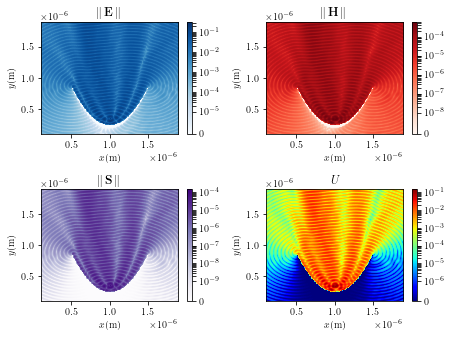

In [3]:
b, e = (0.5e-6, 0.2e-6, 0), (1.5e-6, 1.5e-6, 0)
be = tuple(end - begin for (begin, end) in zip(b, e))
f, t = 1e-7, 4e-8
print((b[0] + be[0] / 2, b[1] + t + f, 0))
solver = slhfdtd.Solver((2e-6, 2e-6, 0), 1e-8)
solver.add_source(slhfdtd.PointSource((b[0] + be[0] / 2, b[1] + t + f, 0),
                                      wavelength=100e-9))
solver.add_boundary(slhfdtd.ParabolicReflector(b, e, f, t))
solver.add_boundary(slhfdtd.AutoPML())
solver.run(10e-15)

visualizer = slhfdtd.Visualizer(solver)
visualizer.set_variables(norms='log')
fig, axs = visualizer.plot2d_magnitude()

# plt.savefig('planewave.pdf', bbox_inches='tight')

## Simple Refraction and Reflection for Plane Waves

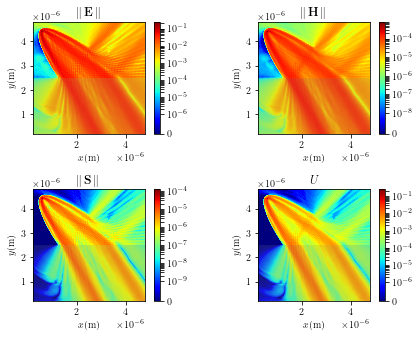

In [4]:
b, e = (0.2e-6, 2.5e-6, 0), (2.5e-6, 4.8e-6, 0)
be = tuple(end - begin for (begin, end) in zip(b, e))
f, t = 1e-7, 4e-8

solver = slhfdtd.Solver((5e-6, 5e-6, 0), 1e-8)
solver.add_source(slhfdtd.PointSource(
    (b[0] + be[0] / 8 + (t + f) / 2**0.5,
        e[1] - be[1] / 8 - (t + f) / 2**0.5, 0),
    wavelength=100e-9
))
solver.add_boundary(slhfdtd.ParabolicReflector(
    b, e, f, t, direction=0, angle=-pi/4,
    translate=(-be[0] / 2**2.5, be[1] / 2**1.5, 0)
))
solver.add_boundary(slhfdtd.AutoPML(thickness=2e-7))
solver.add_object(slhfdtd.Slab((0, 0, 0), (5e-6, 2.5e-6, 0), 2))
solver.run(2.6e-14)

visualizer = slhfdtd.Visualizer(solver)
visualizer.set_variables(norms='log', cmaps='jet', object_colors='gray')
visualizer.set_aspect('equal')
visualizer.plot2d_magnitude()

# plt.savefig('ref.pdf', bbox_inches='tight')